<a href="https://colab.research.google.com/github/LerinaMM/satisfacao_consumidor_aneel/blob/main/ANEEL_NOVA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Verificando o dicionário de dados

In [3]:
dicionario=pd.read_html("https://dadosabertos.aneel.gov.br/dataset/ouvidoria-setorial-aneel/resource/927c458a-760c-470f-9967-f9f5e8809095")[0]
dicionario

,Coluna,Tipo,Rótulo,Descrição
0,DatGeracaoConjuntoDados,text,NaN,NaN
1,SigAgente,text,NaN,NaN
2,NumCPFCNPJAgente,text,NaN,NaN
3,SigUF,text,NaN,NaN
4,CodigoMunicipio,text,NaN,NaN
5,NomMunicipio,text,NaN,NaN
6,NomCategoria,text,NaN,NaN
7,NomSubCategoria,text,NaN,NaN
8,NomTipologia,text,NaN,NaN
9,NomDecisao,text,NaN,NaN


Verificamos que nao possuimos descrição para as os datasets coletados

#3. Realizando a chamada dos datasets por ano

In [4]:
df_2022=pd.read_csv("/content/drive/MyDrive/Datasets/aneel/ouvidoria-aneel-2022.csv",
               parse_dates=["DatGeracaoConjuntoDados","DtCriacao"], encoding="latin-1",
               on_bad_lines='skip', sep=";")
df_2022.head()


,DatGeracaoConjuntoDados,SigAgente,NumCPFCNPJAgente,SigUF,CodigoMunicipio,NomMunicipio,NomCategoria,NomSubCategoria,NomTipologia,NomDecisao,DscSituacao,DtCriacao,NumQtdReclamacoesDia
0,2023-08-01,Energisa AC,4065033000170,AC,1200450,Senador Guiomard,Informação,Atendimento,Atend Digital,Sem decisão,Finalizada por Script,2022-12-02,1
1,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Informação,Atendimento,Atend Telefônico,Sem decisão,Finalizada por Script,2022-10-04,1
2,2023-08-01,Energisa AC,4065033000170,AC,1200203,Cruzeiro do Sul,Informação,Cobranças,Cobrança Irregularidades,Sem decisão,Encerrada,2022-08-05,1
3,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Informação,Atendimento,Atend Presencial,Sem decisão,Finalizada por Script,2022-02-10,1
4,2023-08-01,Energisa AC,4065033000170,AC,1200401,Rio Branco,Informação,Cobranças,Cobrança Irregularidades,Sem decisão,Encerrada,2022-04-15,1


In [5]:
df_2021=pd.read_csv("/content/drive/MyDrive/Datasets/aneel/ouvidoria-aneel-2021.csv",
            parse_dates=["DatGeracaoConjuntoDados","DtCriacao"], encoding="latin-1",
            on_bad_lines='skip', sep=";")

In [6]:
df_2020=pd.read_csv("/content/drive/MyDrive/Datasets/aneel/ouvidoria-aneel-2020.csv",
            parse_dates=["DatGeracaoConjuntoDados","DtCriacao"], encoding="latin-1",
            on_bad_lines='skip', sep=";")

In [7]:
df_2019=pd.read_csv("/content/drive/MyDrive/Datasets/aneel/ouvidoria-aneel-2019.csv",
            parse_dates=["DatGeracaoConjuntoDados","DtCriacao"], encoding="latin-1",
            on_bad_lines='skip', sep=";")

In [8]:
df_2018=pd.read_csv("/content/drive/MyDrive/Datasets/aneel/ouvidoria-aneel-2018.csv",
            parse_dates=["DatGeracaoConjuntoDados","DtCriacao"], encoding="latin-1",
            on_bad_lines='skip', sep=";")

In [9]:
df_2017=pd.read_csv("/content/drive/MyDrive/Datasets/aneel/ouvidoria-aneel-2017.csv",
            parse_dates=["DatGeracaoConjuntoDados","DtCriacao"], encoding="latin-1",
            on_bad_lines='skip', sep=";")

In [10]:
df_2016=pd.read_csv("/content/drive/MyDrive/Datasets/aneel/ouvidoria-aneel-2016.csv",
            parse_dates=["DatGeracaoConjuntoDados","DtCriacao"], encoding="latin-1",
            on_bad_lines='skip', sep=";")

In [11]:
df_2015=pd.read_csv("/content/drive/MyDrive/Datasets/aneel/ouvidoria-aneel-2015.csv",
            parse_dates=["DatGeracaoConjuntoDados","DtCriacao"], encoding="latin-1",
            on_bad_lines='skip', sep=";")

In [12]:
df_2014=pd.read_csv("/content/drive/MyDrive/Datasets/aneel/ouvidoria-aneel-2014.csv",
            parse_dates=["DatGeracaoConjuntoDados","DtCriacao"], encoding="latin-1",
            on_bad_lines='skip', sep=";")

#4. Agregando a analise um dataset de municipios brasileiros

In [13]:
df_mun=pd.read_csv("//content/drive/MyDrive/Datasets/aneel/municipios.csv")
df_mun.head(2)

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.7573,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.4831,-47.3916,0,31,4001,34,America/Sao_Paulo


#5. Iniciando o processo de união dos datasets começando em 2014 até 2022

In [14]:
list_dataframe=[df_2022, df_2021,df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014]

In [15]:
for item in list_dataframe:
    display(item.isna().sum())
    display(item.shape)

DatGeracaoConjuntoDados    0
SigAgente                  0
NumCPFCNPJAgente           0
SigUF                      0
CodigoMunicipio            0
NomMunicipio               2
NomCategoria               2
NomSubCategoria            0
NomTipologia               2
NomDecisao                 0
DscSituacao                0
DtCriacao                  0
NumQtdReclamacoesDia       0
dtype: int64

(471835, 13)

DatGeracaoConjuntoDados    0
SigAgente                  0
NumCPFCNPJAgente           0
SigUF                      0
CodigoMunicipio            0
NomMunicipio               6
NomCategoria               0
NomSubCategoria            0
NomTipologia               0
NomDecisao                 0
DscSituacao                0
DtCriacao                  0
NumQtdReclamacoesDia       0
dtype: int64

(516123, 13)

DatGeracaoConjuntoDados     0
SigAgente                   0
NumCPFCNPJAgente            0
SigUF                       0
CodigoMunicipio             0
NomMunicipio               60
NomCategoria                0
NomSubCategoria             0
NomTipologia                0
NomDecisao                  0
DscSituacao                 0
DtCriacao                   0
NumQtdReclamacoesDia        0
dtype: int64

(573645, 13)

DatGeracaoConjuntoDados    0
SigAgente                  0
NumCPFCNPJAgente           0
SigUF                      0
CodigoMunicipio            1
NomMunicipio               3
NomCategoria               0
NomSubCategoria            0
NomTipologia               0
NomDecisao                 0
DscSituacao                0
DtCriacao                  0
NumQtdReclamacoesDia       0
dtype: int64

(539865, 13)

DatGeracaoConjuntoDados     0
SigAgente                   0
NumCPFCNPJAgente            0
SigUF                       0
CodigoMunicipio            20
NomMunicipio               24
NomCategoria                0
NomSubCategoria             0
NomTipologia                0
NomDecisao                  0
DscSituacao                 0
DtCriacao                   0
NumQtdReclamacoesDia        0
dtype: int64

(477197, 13)

DatGeracaoConjuntoDados     0
SigAgente                   0
NumCPFCNPJAgente            0
SigUF                       0
CodigoMunicipio            11
NomMunicipio               12
NomCategoria                0
NomSubCategoria             0
NomTipologia                0
NomDecisao                  0
DscSituacao                 0
DtCriacao                   0
NumQtdReclamacoesDia        0
dtype: int64

(428964, 13)

DatGeracaoConjuntoDados     0
SigAgente                   0
NumCPFCNPJAgente            0
SigUF                       0
CodigoMunicipio             9
NomMunicipio               12
NomCategoria                0
NomSubCategoria             0
NomTipologia                0
NomDecisao                  0
DscSituacao                 0
DtCriacao                   0
NumQtdReclamacoesDia        0
dtype: int64

(391630, 13)

DatGeracaoConjuntoDados     0
SigAgente                   0
NumCPFCNPJAgente            0
SigUF                       1
CodigoMunicipio            41
NomMunicipio               42
NomCategoria                0
NomSubCategoria             0
NomTipologia                0
NomDecisao                  0
DscSituacao                 0
DtCriacao                   0
NumQtdReclamacoesDia        0
dtype: int64

(550378, 13)

DatGeracaoConjuntoDados     0
SigAgente                   0
NumCPFCNPJAgente            0
SigUF                       9
CodigoMunicipio            16
NomMunicipio               18
NomCategoria                0
NomSubCategoria             0
NomTipologia                0
NomDecisao                  0
DscSituacao                 0
DtCriacao                   0
NumQtdReclamacoesDia        0
dtype: int64

(387127, 13)

In [16]:
for item in list_dataframe:
    item["NumQtdReclamacoesDia"]=pd.to_numeric(item["NumQtdReclamacoesDia"], errors="coerce")


##6.1 Realizando o concat de todos os anos que serão analisados

In [17]:
df_all = pd.concat([df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014], ignore_index=True)

In [18]:
#Verificando a união de todos os conjuntos de dados

df_all.head(1)

,DatGeracaoConjuntoDados,SigAgente,NumCPFCNPJAgente,SigUF,CodigoMunicipio,NomMunicipio,NomCategoria,NomSubCategoria,NomTipologia,NomDecisao,DscSituacao,DtCriacao,NumQtdReclamacoesDia
0,2023-08-01,Energisa AC,4065033000170,AC,1200450.0,Senador Guiomard,Informação,Atendimento,Atend Digital,Sem decisão,Finalizada por Script,2022-12-02,1


In [19]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336764 entries, 0 to 4336763
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   DatGeracaoConjuntoDados  datetime64[ns]
 1   SigAgente                object        
 2   NumCPFCNPJAgente         int64         
 3   SigUF                    object        
 4   CodigoMunicipio          float64       
 5   NomMunicipio             object        
 6   NomCategoria             object        
 7   NomSubCategoria          object        
 8   NomTipologia             object        
 9   NomDecisao               object        
 10  DscSituacao              object        
 11  DtCriacao                datetime64[ns]
 12  NumQtdReclamacoesDia     int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 430.1+ MB


In [20]:
#Verificação se temos dados duplicados

df_all.duplicated().sum()

0

Nao temos dados duplicados no dataset

In [21]:
#Verificando a quantidade de dados nulos nas colunas

df_all.isnull().sum()

DatGeracaoConjuntoDados      0
SigAgente                    0
NumCPFCNPJAgente             0
SigUF                       10
CodigoMunicipio             98
NomMunicipio               179
NomCategoria                 2
NomSubCategoria              0
NomTipologia                 2
NomDecisao                   0
DscSituacao                  0
DtCriacao                    0
NumQtdReclamacoesDia         0
dtype: int64

In [22]:
df_all.shape

(4336764, 13)

Temos um total de 13 colunas e mais de 4 milhões de dados no dataset

##6.1 Obter a primeira e a última data do dataset

In [23]:
primeira_data = df_all['DtCriacao'].min()
ultima_data = df_all['DtCriacao'].max()

print('Primeira data:', primeira_data)
print('Última data:', ultima_data)

Primeira data: 2014-01-01 00:00:00
Última data: 2022-12-31 00:00:00


#7 Verificando as colunas do dataset para verificar a distribuição de ligações a ouvidoria

In [24]:
df_all['NomCategoria'].value_counts()

Informação          3171446
Reclamações         1155837
Denúncias              7222
Sugestão/Crítica       1627
Elogio                  630
Name: NomCategoria, dtype: int64

In [25]:
df_all['NomSubCategoria'].value_counts()

Qualidade do Fornecimento    1308272
Serviços Comerciais           974360
Faturamento                   786442
Cobranças                     732935
Serviços Técnicos             229441
Outros                        199701
Atendimento                    96134
Denúncias                       7222
Sugestão/Crítica                1627
Elogio                           630
Name: NomSubCategoria, dtype: int64

In [26]:
df_all['DscSituacao'].value_counts()

Finalizada por Script                           3048689
Encerrada distribuidora                          710594
Encerrada                                        488726
Encerrada pela Agencia                            88421
Reiterada                                           181
Novos Questionamentos à Concessionária               61
Em tramitação/Análise/Avaliação pela Agencia         39
Retorno da Concessionária                            29
Retorno para GAO                                     19
Aguarda Resposta Concessionária                       2
Devolvida à Concessionária                            1
Redistribuição manual                                 1
Encaminhada AGEPAN                                    1
Name: DscSituacao, dtype: int64

In [27]:
df_all.groupby('NomCategoria')[['NomSubCategoria']].value_counts()

NomCategoria      NomSubCategoria          
Denúncias         Denúncias                      7222
Elogio            Elogio                          630
Informação        Qualidade do Fornecimento    980181
                  Serviços Comerciais          751762
                  Cobranças                    597060
                  Faturamento                  543549
                  Outros                       196720
                  Atendimento                   52244
                  Serviços Técnicos             49930
Reclamações       Qualidade do Fornecimento    328091
                  Faturamento                  242893
                  Serviços Comerciais          222598
                  Serviços Técnicos            179511
                  Cobranças                    135875
                  Atendimento                   43890
                  Outros                         2979
Sugestão/Crítica  Sugestão/Crítica               1627
dtype: int64

##7.1 Vamos analisar a frequencia de ligações por ano

In [28]:
df_all['ano'] = df_all['DtCriacao'].dt.year
df_all['mes'] = df_all['DtCriacao'].dt.month
df_all['dia'] = df_all['DtCriacao'].dt.day

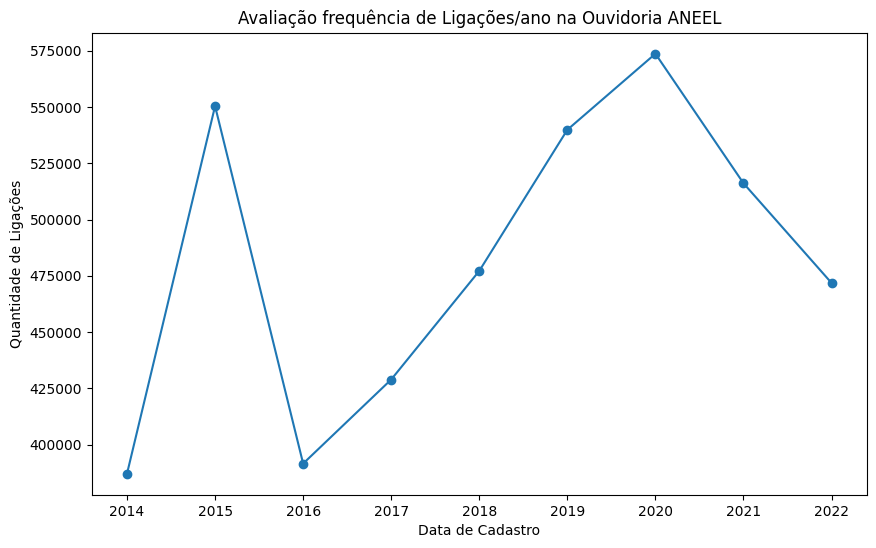

In [29]:
# Contagem do número de denúncias em cada mês
frequencia_ligacoes = df_all.groupby('ano').size()

# Criação de um gráfico de linha para visualizar a frequência de denúncias ao longo do tempo

plt.figure(figsize=(10, 6))
frequencia_ligacoes.plot(kind='line', marker='o')
plt.xlabel('Data de Cadastro')
plt.ylabel('Quantidade de Ligações')
plt.title('Avaliação frequência de Ligações/ano na Ouvidoria ANEEL')
plt.show()

In [30]:
df_all['SigAgente'].value_counts().head(20)

Enel GO                  354316
Enel CE                  349154
Enel SP                  348466
Cemig                    337061
Neoenergia Coelba        306575
Neoenergia Pernambuco    285721
Enel RJ                  251639
CPFL Paulista            230442
Light                    185323
CEEE Equatorial          155859
Neoenergia Elektro       147576
RGE                      141944
Copel                    136230
Equatorial PA            135950
CPFL Piratininga         113697
EDP SP                   102239
Equatorial AL             73833
Energisa MT               58834
EDP ES                    57384
Neoenergia Cosern         56328
Name: SigAgente, dtype: int64

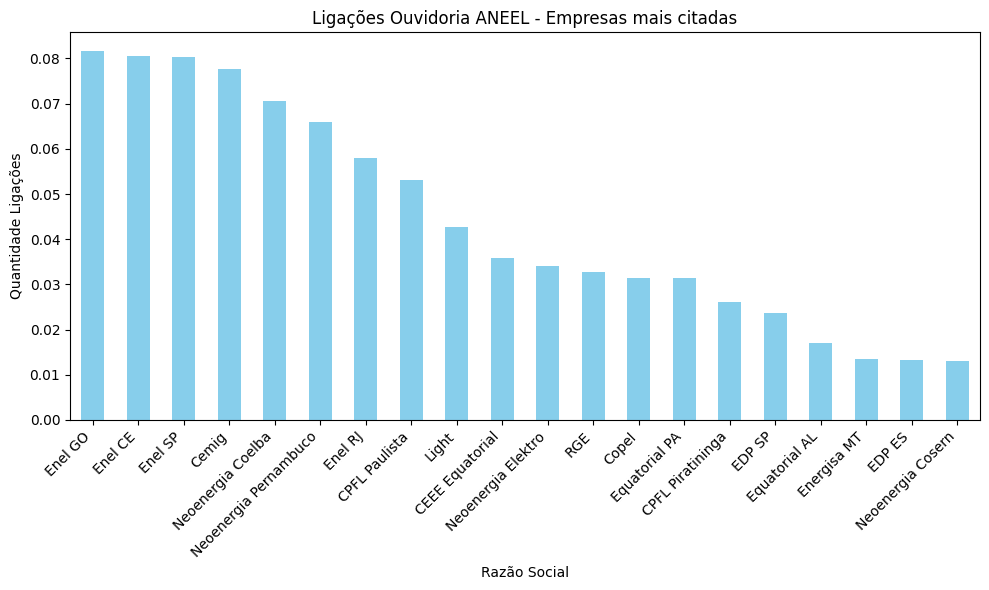

In [31]:
# Verificando a frequencia de Ligações a Ouvidoria da Aneel

# Conte a frequência de cada canal de atendimento
quantidade_ouvidoria = df_all['SigAgente'].value_counts(10)

# Crie um gráfico de barras para visualizar a frequência de reclamacao dos planos
plt.figure(figsize=(10, 6))
quantidade_ouvidoria.head(20).plot(kind='bar', color='skyblue')
plt.title('Ligações Ouvidoria ANEEL - Empresas mais citadas')
plt.xlabel('Razão Social')
plt.ylabel('Quantidade Ligações')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#8. Vamos analisar neste momento somente a coluna NomCategoria referente a "Reclamações"

In [32]:
df_recl = df_all.query('NomCategoria == "Reclamações"')

In [33]:
df_recl.head()

,DatGeracaoConjuntoDados,SigAgente,NumCPFCNPJAgente,SigUF,CodigoMunicipio,NomMunicipio,NomCategoria,NomSubCategoria,NomTipologia,NomDecisao,DscSituacao,DtCriacao,NumQtdReclamacoesDia,ano,mes,dia
183,2023-08-01,Energisa AC,4065033000170,AC,1200401.0,Rio Branco,Reclamações,Cobranças,Cobrança Indevida,Sem decisão,Encerrada distribuidora,2022-02-15,1,2022,2,15
191,2023-08-01,Energisa AC,4065033000170,AC,1200401.0,Rio Branco,Reclamações,Cobranças,Cobrança Irregularidades,Improcedente,Encerrada,2022-08-04,1,2022,8,4
197,2023-08-01,Energisa AC,4065033000170,AC,1200401.0,Rio Branco,Reclamações,Atendimento,Nenhuma das Anteriores,Sem decisão,Encerrada distribuidora,2022-06-09,1,2022,6,9
199,2023-08-01,Energisa AC,4065033000170,AC,1200401.0,Rio Branco,Reclamações,Cobranças,Cobrança Irregularidades,Improcedente,Encerrada,2022-08-30,1,2022,8,30
205,2023-08-01,Energisa AC,4065033000170,AC,1200401.0,Rio Branco,Reclamações,Cobranças,Cobrança Irregularidades,Improcedente,Encerrada,2022-01-12,1,2022,1,12


## 8.1 Agora vamos verificar se as companhias continuam as mesmas que recebem mais ligações na ouvidoria classificando por "reclamações

In [34]:
df_recl['SigAgente'].value_counts().head(20)

Cemig                    122525
Enel SP                  110590
Enel RJ                  108556
Light                    105322
Neoenergia Coelba         89815
Enel GO                   56248
Enel CE                   55604
CPFL Paulista             47786
Neoenergia Pernambuco     45153
Equatorial PA             44373
Neoenergia Elektro        35609
CEEE Equatorial           32059
RGE                       31685
EDP SP                    25304
CPFL Piratininga          23447
Copel                     23409
Celesc                    18568
Energisa MT               18224
Equatorial PI             18038
EDP ES                    15602
Name: SigAgente, dtype: int64

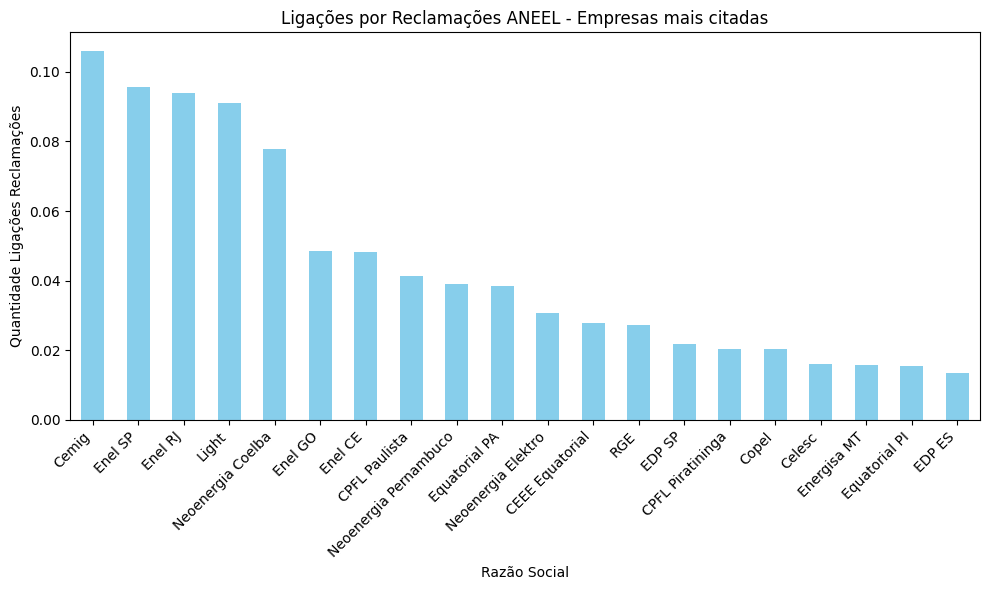

In [35]:
# Verificando a quantidade de Ligações referentes a RECLAMAÇÕES a Ouvidoria da Aneel

# Conte a frequência de cada canal de atendimento
qtidade_recl = df_recl['SigAgente'].value_counts(10)

# Crie um gráfico de barras para visualizar a quantidade de reclamações das companhias de energia
plt.figure(figsize=(10, 6))
qtidade_recl.head(20).plot(kind='bar', color='skyblue')
plt.title('Ligações por Reclamações ANEEL - Empresas mais citadas')
plt.xlabel('Razão Social')
plt.ylabel('Quantidade Ligações Reclamações')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
df_recl['NomTipologia'].value_counts().head(20)

Falta de Energia            167052
Variação de Consumo         139398
Ligação                      98586
Ressarcimento de Danos       68539
Extensão de Rede             60908
Religação                    50770
Oscilação de Tensão          50534
Cobrança Irregularidades     39467
Interrup Frequentes          36960
Conexão Microgeração         36450
Suspensão Indevida           31779
Entrega da Fatura            31661
Cobrança Indevida            31182
Atend Telefônico             30023
Alteração Cadastral          27668
Fatur por Média              26652
Aferição Medidor             24606
Alteração de carga           23919
Fatur Microgeração           18723
Relocação Poste/Rede         14910
Name: NomTipologia, dtype: int64

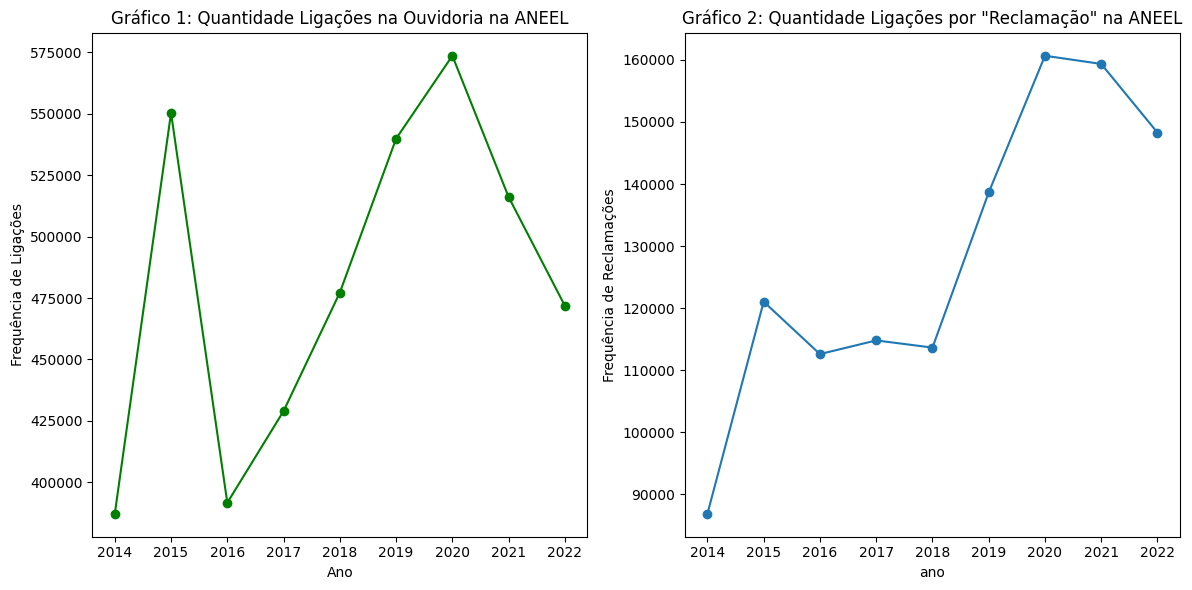

In [37]:
# Contagem do número de denúncias em cada mês
frequencia_reclamacoes = df_recl.groupby('ano').size()

# Criação de um gráfico de linha para visualizar a frequência de denúncias ao longo do tempo

plt.figure(figsize=(12, 6))

# Primeiro grafico

plt.subplot(1, 2, 1)
frequencia_ligacoes.plot(kind='line', marker='o', color='green')
plt.xlabel('Ano')
plt.ylabel('Frequência de Ligações')
plt.title('Gráfico 1: Quantidade Ligações na Ouvidoria na ANEEL')
plt.tight_layout()

# Segundo grafico

plt.subplot(1,2,2)
frequencia_reclamacoes.plot(kind='line', marker='o')
plt.xlabel('ano')
plt.ylabel('Frequência de Reclamações')
plt.title('Gráfico 2: Quantidade Ligações por "Reclamação" na ANEEL')
plt.tight_layout()

plt.show()

In [38]:
# Mapeamento de estados para regiões

estado_para_regiao = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
    'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
    'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte',
    'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
}

In [39]:
# Adicionar a nova coluna 'Regiao' ao DataFrame usando o mapeamento
def_recl['Regiao'] = def_recl['SigUF'].map(estado_para_regiao)

NameError: ignored

Escolhendo as colunas que serão trabalhadas

#9. Preparando Modelo para predição

In [40]:
# Ordenar os dados pelo campo de data

df_recl = df_recl.sort_values('DtCriacao')

In [41]:
# Criar uma coluna com a quantidade acumulada de reclamações por dia

df_recl['AcumuladoReclamacoes'] = df_recl['NumQtdReclamacoesDia'].cumsum()

In [42]:
df_recl.head()

,DatGeracaoConjuntoDados,SigAgente,NumCPFCNPJAgente,SigUF,CodigoMunicipio,NomMunicipio,NomCategoria,NomSubCategoria,NomTipologia,NomDecisao,DscSituacao,DtCriacao,NumQtdReclamacoesDia,ano,mes,dia,AcumuladoReclamacoes
4113236,2023-01-30,EDP ES,28152650000171,ES,3203205.0,Linhares,Reclamações,Qualidade do Fornecimento,Falta de Energia,Procedente,Encerrada,2014-01-01,1,2014,1,1,1
4267496,2023-01-30,Cemig,6981180000116,MG,3136702.0,Juiz de Fora,Reclamações,Qualidade do Fornecimento,Falta de Energia,Procedente,Encerrada,2014-01-01,1,2014,1,1,2
4063432,2023-01-30,Neoenergia Coelba,15139629000194,BA,2920700.0,Maraú,Reclamações,Qualidade do Fornecimento,Falta de Energia,Procedente,Encerrada,2014-01-01,1,2014,1,1,3
4122750,2023-01-30,Light,60444437000146,RJ,3304557.0,Rio de Janeiro,Reclamações,Qualidade do Fornecimento,Oscilação de Tensão,Procedente,Encerrada,2014-01-01,1,2014,1,1,4
4151189,2023-01-30,Enel RJ,33050071000158,RJ,3301900.0,Itaboraí,Reclamações,Qualidade do Fornecimento,Falta de Energia,Procedente,Encerrada,2014-01-01,1,2014,1,1,5


In [43]:
df_qualidade = df_recl.query('NomSubCategoria == "Qualidade do Fornecimento"')

In [44]:
df_qualidade.head()

,DatGeracaoConjuntoDados,SigAgente,NumCPFCNPJAgente,SigUF,CodigoMunicipio,NomMunicipio,NomCategoria,NomSubCategoria,NomTipologia,NomDecisao,DscSituacao,DtCriacao,NumQtdReclamacoesDia,ano,mes,dia,AcumuladoReclamacoes
4113236,2023-01-30,EDP ES,28152650000171,ES,3203205.0,Linhares,Reclamações,Qualidade do Fornecimento,Falta de Energia,Procedente,Encerrada,2014-01-01,1,2014,1,1,1
4267496,2023-01-30,Cemig,6981180000116,MG,3136702.0,Juiz de Fora,Reclamações,Qualidade do Fornecimento,Falta de Energia,Procedente,Encerrada,2014-01-01,1,2014,1,1,2
4063432,2023-01-30,Neoenergia Coelba,15139629000194,BA,2920700.0,Maraú,Reclamações,Qualidade do Fornecimento,Falta de Energia,Procedente,Encerrada,2014-01-01,1,2014,1,1,3
4122750,2023-01-30,Light,60444437000146,RJ,3304557.0,Rio de Janeiro,Reclamações,Qualidade do Fornecimento,Oscilação de Tensão,Procedente,Encerrada,2014-01-01,1,2014,1,1,4
4151189,2023-01-30,Enel RJ,33050071000158,RJ,3301900.0,Itaboraí,Reclamações,Qualidade do Fornecimento,Falta de Energia,Procedente,Encerrada,2014-01-01,1,2014,1,1,5


In [45]:
df_qualidade['NomTipologia'].value_counts().head(20)

Falta de Energia             167052
Ressarcimento de Danos        68539
Oscilação de Tensão           50534
Interrup Frequentes           36960
Interrup Programada            4269
Nenhuma das Anteriores          733
Qualidade do Fornecimento         4
Name: NomTipologia, dtype: int64

In [46]:
df_qualidade['NomDecisao'].value_counts().head(20)

Procedente      162455
Sem decisão     104459
Improcedente     61177
Name: NomDecisao, dtype: int64

In [47]:
#Verificando se a data esta em formato datetime

df_qualidade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328091 entries, 4113236 to 44772
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DatGeracaoConjuntoDados  328091 non-null  datetime64[ns]
 1   SigAgente                328091 non-null  object        
 2   NumCPFCNPJAgente         328091 non-null  int64         
 3   SigUF                    328089 non-null  object        
 4   CodigoMunicipio          328090 non-null  float64       
 5   NomMunicipio             328067 non-null  object        
 6   NomCategoria             328091 non-null  object        
 7   NomSubCategoria          328091 non-null  object        
 8   NomTipologia             328091 non-null  object        
 9   NomDecisao               328091 non-null  object        
 10  DscSituacao              328091 non-null  object        
 11  DtCriacao                328091 non-null  datetime64[ns]
 12  NumQtdRecla

In [48]:
# Criando um novo conjunto de dados para realizar o agrupando as reclamações por mês

novo_df_pred= df_qualidade.groupby(df_qualidade['DtCriacao'].dt.to_period("M")).size().reset_index()
novo_df_pred.columns = ['Mes', 'QuantidadeReclamacoes']

# Exibir o novo conjunto de dados
print(novo_df_pred)

         Mes  QuantidadeReclamacoes
0    2014-01                   2953
1    2014-02                   3138
2    2014-03                   2832
3    2014-04                   2789
4    2014-05                   2269
..       ...                    ...
103  2022-08                   2572
104  2022-09                   2377
105  2022-10                   2906
106  2022-11                   3188
107  2022-12                   3960

[108 rows x 2 columns]


In [49]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 63.0 MB/s eta 0:0

In [50]:
novo_df_pred.head()

,Mes,QuantidadeReclamacoes
0,2014-01,2953
1,2014-02,3138
2,2014-03,2832
3,2014-04,2789
4,2014-05,2269


In [51]:
from pycaret.time_series import *

In [52]:
novo_df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   Mes                    108 non-null    period[M]
 1   QuantidadeReclamacoes  108 non-null    int64    
dtypes: int64(1), period[M](1)
memory usage: 1.8 KB


In [53]:
#Transformar a coluna mes "setando o index"

novo_df_pred.set_index('Mes', drop=True, inplace=True)

In [54]:
novo_df_pred.head()

,QuantidadeReclamacoes
Mes,
2014-01,2953
2014-02,3138
2014-03,2832
2014-04,2789
2014-05,2269


<Axes: xlabel='Mes'>

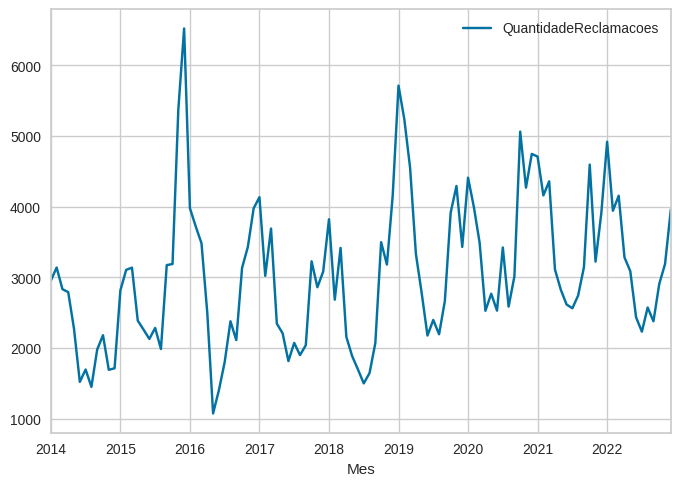

In [60]:
#verificando a sazonalidade das reclamações

novo_df_pred.plot()

In [55]:
from pycaret.time_series import *

In [65]:
setup(novo_df_pred, fh=6, seasonal_period='M' )

,Description,Value
0,session_id,3641
1,Target,QuantidadeReclamacoes
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(108, 1)"
5,Transformed data shape,"(108, 1)"
6,Transformed train set shape,"(102, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [66]:
#Verificando o melhor modelo

best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.3493,0.2708,254.3936,289.7970,0.0729,0.0725,0.7998,0.4800
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.3635,0.3127,264.9257,335.2169,0.0751,0.0704,0.7073,0.4367
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.3711,0.3109,270.9449,333.2371,0.0766,0.0749,0.7392,0.5267
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.3725,0.3224,272.1773,346.1211,0.0793,0.0746,0.7025,0.4767
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.3811,0.3141,278.9981,337.7516,0.0797,0.0755,0.7251,0.3967
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.3965,0.3327,290.9088,358.3553,0.0833,0.0789,0.7122,0.2633
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.3965,0.3327,290.9094,358.3562,0.0833,0.0789,0.7122,0.2767
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.3965,0.3327,290.9090,358.3557,0.0833,0.0789,0.7122,0.2667
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.3965,0.3327,290.9094,358.3562,0.0833,0.0789,0.7122,0.2733
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.3965,0.3327,290.9088,358.3553,0.0833,0.0789,0.7122,0.2633


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [67]:
et_cds_dt = create_model('et_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2020-12,0.1525,0.1171,115.7330,129.7169,0.0327,0.0330,0.9742
1,2021-06,0.5665,0.4444,411.7924,476.3617,0.1196,0.1155,0.5323
2,2021-12,0.3288,0.2510,235.6556,263.3124,0.0664,0.0689,0.8929
Mean,NaT,0.3493,0.2708,254.3936,289.7970,0.0729,0.0725,0.7998
SD,NaT,0.1696,0.1344,121.5898,142.7509,0.0357,0.0338,0.1920


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [68]:
plot_model(et_cds_dt, plot='decomp_stl')

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.
In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


In [69]:
plot_model(et_cds_dt, plot='train_test_split')

In [73]:
final = finalize_model(et_cds_dt)

In [74]:
final

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12,
                                                                                                                                        11,
                                                                                                                                        10,
                                                                                                                                        9,
                                                                                                                                        8,
                                                                                                                                        7,
                                                                                                                                        6,
                                                                                                                                        5,
                                                                                                                                        4,
                                                                                                                                        3,
                                                                                                                                        2,
                                                                                                                                        1]},
                                                                                                                   n_jobs=1)],
                                                                                    regressor=ExtraTreesRegressor(n_jobs=-1, random_state=3641),
                                                                                    sp=12,
                                                                                    window_length=12))]))])

In [75]:
plot_model(final, plot='forecast')

#Proximos 12 meses

In [76]:
plot_model(final, plot='forecast', data_kwargs={'fh' : 12})